In [1]:

import plotly.graph_objs as go
from plotly.offline import plot

#prepare plotting points
#points are: (0,5,5),(5,0,0),(5,10,5),(10,5,5)
points = go.Scatter3d( x = [0,5,5,10],
                       y = [5,0,10,5],
                       z = [5,0,5,0],
                       mode = 'markers',
                       marker = dict( size = 2,
                                      color = "rgb(227,26,28)")
                     )
#Compute centroid of all 3 points by taking the mean of each of
#its coordinates (not sure this is the right definition of centroid)
centerX = (0+5+5+10) / float(4)
centerY = (5+0+10+5) / float(4)
centerZ = (5+0+5+0) / float(4)

#Prepare centroid vector
vector = go.Scatter3d( x = [0,centerX],
                       y = [0,centerY],
                       z = [0,centerZ],
                       marker = dict( size = 1,
                                      color = "rgb(84,48,5)"),
                       line = dict( color = "rgb(84,48,5)",
                                    width = 6)
                     )
data = [points,vector]
layout = go.Layout(margin = dict( l = 0,
                                  r = 0,
                                  b = 0,
                                  t = 0)
                  )
fig = go.Figure(data=data,layout=layout)
fig.show()
# plot(fig,filename="vector.html",auto_open=False,image='png',image_height=800,image_width=1500)

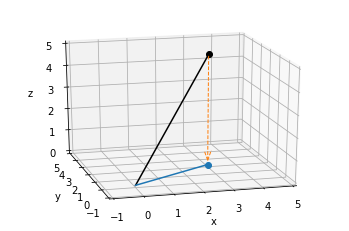

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa
from scipy.linalg import svd


def setup_3d_axes():
    ax = plt.axes(projection='3d')
    ax.view_init(azim=-105, elev=20)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_xlim(-1, 5)
    ax.set_ylim(-1, 5)
    ax.set_zlim(0, 5)
    return ax

ax = setup_3d_axes()

# plot the vector (3, 2, 5)
origin = np.zeros((3, 1))
point = np.array([[3, 2, 5]]).T
vector = np.hstack([origin, point])
ax.plot(*vector, color='k')
ax.plot(*point, color='k', marker='o')

# project the vector onto the x,y plane and plot it
xy_projection_matrix = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 0]])
projected_point = xy_projection_matrix @ point
projected_vector = xy_projection_matrix @ vector
ax.plot(*projected_vector, color='C0')
ax.plot(*projected_point, color='C0', marker='o')

# add dashed arrow showing projection
arrow_coords = np.concatenate([point, projected_point - point]).flatten()
ax.quiver3D(*arrow_coords, length=0.96, arrow_length_ratio=0.1, color='C1',
            linewidth=1, linestyle='dashed')